In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [8]:
from sklearn.metrics import classification_report, confusion_matrix

In [77]:
from category_encoders import CountEncoder as ce, TargetEncoder as te, OneHotEncoder as oe
from category_encoders.cat_boost import CatBoostEncoder as cate
from category_encoders.james_stein import JamesSteinEncoder as je
from category_encoders.woe import WOEEncoder as we
from category_encoders.polynomial import PolynomialEncoder as pe

In [10]:
train = pd.read_csv('historic.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   item_no            8000 non-null   int64  
 1   category           8000 non-null   object 
 2   main_promotion     8000 non-null   object 
 3   color              8000 non-null   object 
 4   stars              8000 non-null   float64
 5   success_indicator  8000 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 375.1+ KB


In [11]:
for col in ['category', 'main_promotion', 'color']:
    print ('-' * 30, col, '-'*30)
    print (train[col].value_counts())
    

------------------------------ category ------------------------------
Tunic         1650
Polo-Shirt    1546
T-Shirt       1459
Sweatshirt    1360
Blouse        1246
Hoodie         739
Name: category, dtype: int64
------------------------------ main_promotion ------------------------------
Category_Highlight     2432
Catalog                2246
Frontpage_Header       2013
Display_Ad_Campaign    1309
Name: main_promotion, dtype: int64
------------------------------ color ------------------------------
Multi-Color    1443
Blue           1244
Yellow         1056
Black           812
Red             776
Green           728
Orange          592
Brown           585
Pink            412
White           352
Name: color, dtype: int64


<AxesSubplot:xlabel='success_indicator', ylabel='count'>

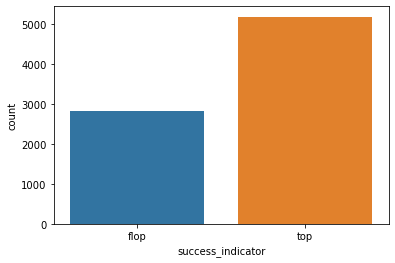

In [12]:
sns.countplot(train.success_indicator)

In [14]:
train['Unisex'] = 1
train.loc[train.category.isin(['Blouse', 'Tunic']), 'Unisex'] = 0

train['Formal'] = 0
train.loc[train.color.isin(['Black', 'Blue', 'Brown', 'White']), 'Formal'] = 1


In [15]:
train.sample(3)

,item_no,category,main_promotion,color,stars,success_indicator,Unisex,Formal
1403,324665,Sweatshirt,Catalog,Red,0.9,flop,1,0
3840,921604,Polo-Shirt,Display_Ad_Campaign,Yellow,5.3,flop,1,0
4403,280790,Hoodie,Catalog,Green,3.9,flop,1,0


In [16]:
y = train.success_indicator.apply(lambda x: 1 if x=='top' else 0)

In [78]:
encoded = pe().fit_transform(train[['category', 'main_promotion', 'color']], y)
X = pd.concat([encoded, train.stars, train.Unisex, train.Formal], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state=42)

rf_model = RandomForestClassifier(class_weight='balanced', oob_score=True, random_state=42)
ex_model = ExtraTreesClassifier(class_weight='balanced', random_state=42)

rf_model.fit(X_train, y_train)
ex_model.fit(X_train, y_train)

print (rf_model.score(X_test, y_test), ex_model.score(X_test, y_test))

0.8045 0.7865


In [79]:
from catboost import CatBoostClassifier
cb_model = CatBoostClassifier(verbose=0, auto_class_weights='SqrtBalanced')

cb_model.fit(X_train, y_train)
print (cb_model.score(X_test, y_test))

0.8475


In [76]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
ada_model = AdaBoostClassifier()
grd_model = GradientBoostingClassifier()

ada_model.fit(X_train, y_train)
grd_model.fit(X_train, y_train)

print (ada_model.score(X_test, y_test), grd_model.score(X_test, y_test))

0.819 0.8335
